In [18]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob

# Create reviews

In [19]:
from src.ask import analyseText
from src.dbkg import consolidateBits

In [20]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")
projets = projets[~(projets.Edition < 2017)]
projets

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Titre du projet lauréat,Thématique,Direction pilote du projet lauréat,Budget global du projet lauréat,Echelle du Budget participatif,Adresse du projet lauréat,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,Date de début des études du projet,Date de lancement des procédures du projet,Date de lancement des travaux du projet,Date prévisonnelle de livraison du projet,Date d'ouverture du projet au public,Dernière mise à jour des données du projet
2,3720,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Une zone de remise en forme au jardin Eole,Cadre de vie,Direction des Espaces Verts et de l’Environnement,110000,Budget participatif d’arrondissement,jardin d'Eole,75018,Oui,FIN,2017-11,2018-04,2018-04,2018-07,2020-03,NaN
3,3780,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,#VillePlusPropre,Propreté,Direction de la Propreté et de l’Eau,3000000,Budget participatif parisien,Place de l' Hôtel de Ville - Esplanade de la L...,75004,Non,FIN,2017-01,2018-09,2018-10,2018-10,2022-01,NaN
4,8597,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2019,Accessibilité au square des Batignolles,Solidarités,Direction des Espaces Verts et de l’Environnement,45000,Budget participatif d’arrondissement,Square des Batignolles,75017,Non,FIN,2020-01,2020-06,2020-06,2020-07,2020-07,NaN
5,8689,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2019,Suite de la restauration de la fontaine Louvois,Culture et patrimoine,Direction des Affaires Culturelles,300000,Budget participatif d’arrondissement,"69 bis, rue de Richelieu",75123,Non,FIN,2020-01,2020-01,2020-05,2020-12,2021-01,NaN
6,8767,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2019,Embellir le Pavillon Carré de Baudouin,Culture et patrimoine,Direction Constructions Publiques et Architecture,500000,Budget participatif d’arrondissement,121 rue de Ménilmontant,75020,Oui,FIN,2020-01,2021-02,2022-07,2022-12,2023-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,6042,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Une salle culturelle dans les ex bains-douches...,Solidarités,Direction Constructions Publiques et Architecture,950000,Budget participatif d’arrondissement,12 rue d'Alésia,75014,Non,ETUDES,2023-12,2024-05,NaN,2024-12,NaN,NaN
1208,6381,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Favoriser l'accueil de manifestations aux Arèn...,Culture et patrimoine,Direction des Espaces Verts et de l’Environnement,40000,Budget participatif d’arrondissement,49 rue Monge,75005,Non,FIN,2018-10,2019-02,2020-01,2020-06,2020-03,NaN
1209,6282,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Faciliter les traversées piétonnes du Canal Sa...,Prévention et sécurité,Direction de la Voirie et des Déplacements,200000,Budget participatif d’arrondissement,146 quai de Jemmapes,75010,Oui,TRAVAUX,2019-08,NaN,2024-02,2026-03,NaN,NaN
1210,6196,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Des arbres et des arbustes fruitiers dans le 20e,Environnement,Direction des Espaces Verts et de l’Environnement,100000,Budget participatif d’arrondissement,6 Place Gambetta,75020,Non,FIN,2018-10,2019-10,2019-12,2022-12,2024-02,NaN


In [21]:
import urllib, os
from bs4 import BeautifulSoup

In [5]:
url = "https://decider.paris.fr/bp/jsp/site/Portal.jsp?page=idee&campagne=C&idee=001127"
for srcurl in list(projets["Lien URL vers le projet lauréat"].unique()):
    ID = str(hashlib.md5(srcurl.encode("utf-8")).hexdigest())
    PATH = "data/pages/"+ID+".html"
    if not os.path.isfile(PATH):
        print(ID,srcurl)
        with urllib.request.urlopen(srcurl) as url:
            s = url.read().decode() #prop-desc-txt"
            soup = BeautifulSoup(s)
            abstract = soup.find('div', attrs={'class' : 'col-12 col-md-8 col-lg-9'})
            if abstract:
                desc = abstract.text.strip().split("Connectez-vous pour ajouter un nouveau commentaire")[0].replace("Partager sur Facebook","").replace("\nPartager\n","").replace("Partager sur Twitter","").replace("Partager par e-mail","").replace("•","*").strip()
                with open(PATH,"w") as f:
                    f.write(desc)
            else:
                print(srcurl,"has not desc.")

In [6]:
import os

In [22]:
txts = []
for x in glob.glob("data/pages/*.html"):
    name = x.split(os.sep)[-1].split(".")[0]
    with open(x,"r") as f:
        txts.append([name,f.read()])
txts = pd.DataFrame(txts,columns=["ID","text"])
txts["long"] = txts.text.apply(lambda x: len(x))
txts = txts.sort_values(by="long",ascending=False).reset_index(drop=True)
txts

,ID,text,long
0,30958e441694a60a68f99432f76c96d6,Notre production de déchets a doublé en quaran...,19770
1,4a3ec196ac1c9b853738385cd0aaa8b7,Ce projet vise à développer la dynamique socié...,14696
2,4532773660be1eadbeb58a6bdd92e61c,"A travers le projet ""Respirons mieux dans le X...",8595
3,336d2656319d750d94102923496cc59c,La réussite du Plan Climat passera tant par l’...,7889
4,34f3e76c8e38f626158257b8259a1ca7,"Embellir le canal, dépolluer l’eau et l’air, v...",7077
...,...,...,...
794,8cb30caa8687a2110e12efd2e50d6f91,Ce projet vise à installer des boîtes à livres...,138
795,3397dbcc4307170571e016c589fe4405,Le projet consiste à rénover le solarium de la...,128
796,88a34d8156793b607873592e16939716,Ce projet propose de rénover la piscine Mathis...,107
797,7c79a80a052a5f060d0833ebca4c2f8a,Dotons le 5e arrondissement de plus d'arceaux ...,97


<Axes: >

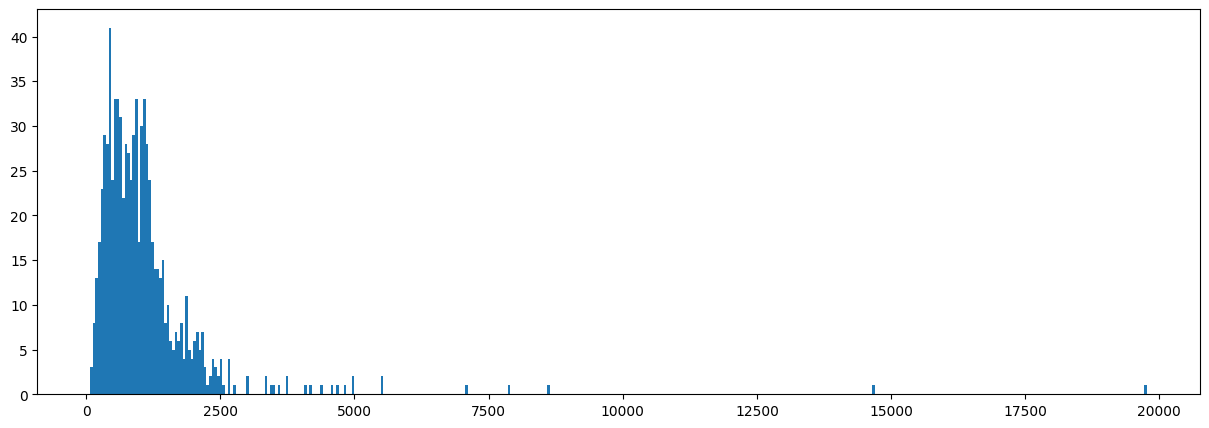

In [27]:
txts.long.hist( bins=400, grid=False, figsize=(15,5))

In [28]:
allDFs = []
for ix, row in txts.iterrows():
    if ix < 550:
        if not os.path.isfile("data/xls/"+str(hashlib.md5(row["text"].encode("utf-8")).hexdigest())+".xlsx"):
            if not len(row["text"]) < 400:
                DD = analyseText( row["text"], TypeOfItem="Activities", PBN=False, Source="BudgetParis", Place="Paris", Reviewed=False, MIN=3, ow=False, seed="..", MODEL="gpt-3.5-turbo" )
                allDFs.append(DD)
pd.concat(allDFs).reset_index(drop=True)

Adding another layer, len(df)= 0
Adding another layer now, len(NEW/df)= 8 / 8 seed: ..
Adding another layer, len(df)= 0
Adding another layer now, len(NEW/df)= 4 / 4 seed: ..
Adding another layer, len(df)= 0
Adding another layer now, len(NEW/df)= 4 / 4 seed: ..
Adding another layer, len(df)= 1
Adding another layer now, len(NEW/df)= 1 / 2 seed: ..
Adding another layer, len(df)= 2
Adding another layer now, len(NEW/df)= 1 / 3 seed: ..
Adding another layer, len(df)= 2
Adding another layer now, len(NEW/df)= 10 / 12 seed: ..
Adding another layer, len(df)= 1
Adding another layer, len(df)= 0
Adding another layer, len(df)= 0
Adding another layer now, len(NEW/df)= 1 / 1 seed: ..--
Adding another layer now, len(NEW/df)= 1 / 1 seed: ..-
Adding another layer now, len(NEW/df)= 1 / 2 seed: ..
Adding another layer, len(df)= 2
Adding another layer, len(df)= 0
Adding another layer, len(df)= 0
Adding another layer now, len(NEW/df)= 1 / 1 seed: ..--
Adding another layer now, len(NEW/df)= 1 / 1 seed: ..-
Ad

# Consolidate excels

In [4]:
df = consolidateBits(PATH="./data/xls/")
print(len(df),"reviews")

1759 reviews


# Creating visuals

In [16]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
items = df.Source.unique()
print(len(items))
df

527


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1755,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1756,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1757,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


/home/kelu/projets/pariso37k/src/img.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/home/kelu/projets/pariso37k/src/img.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


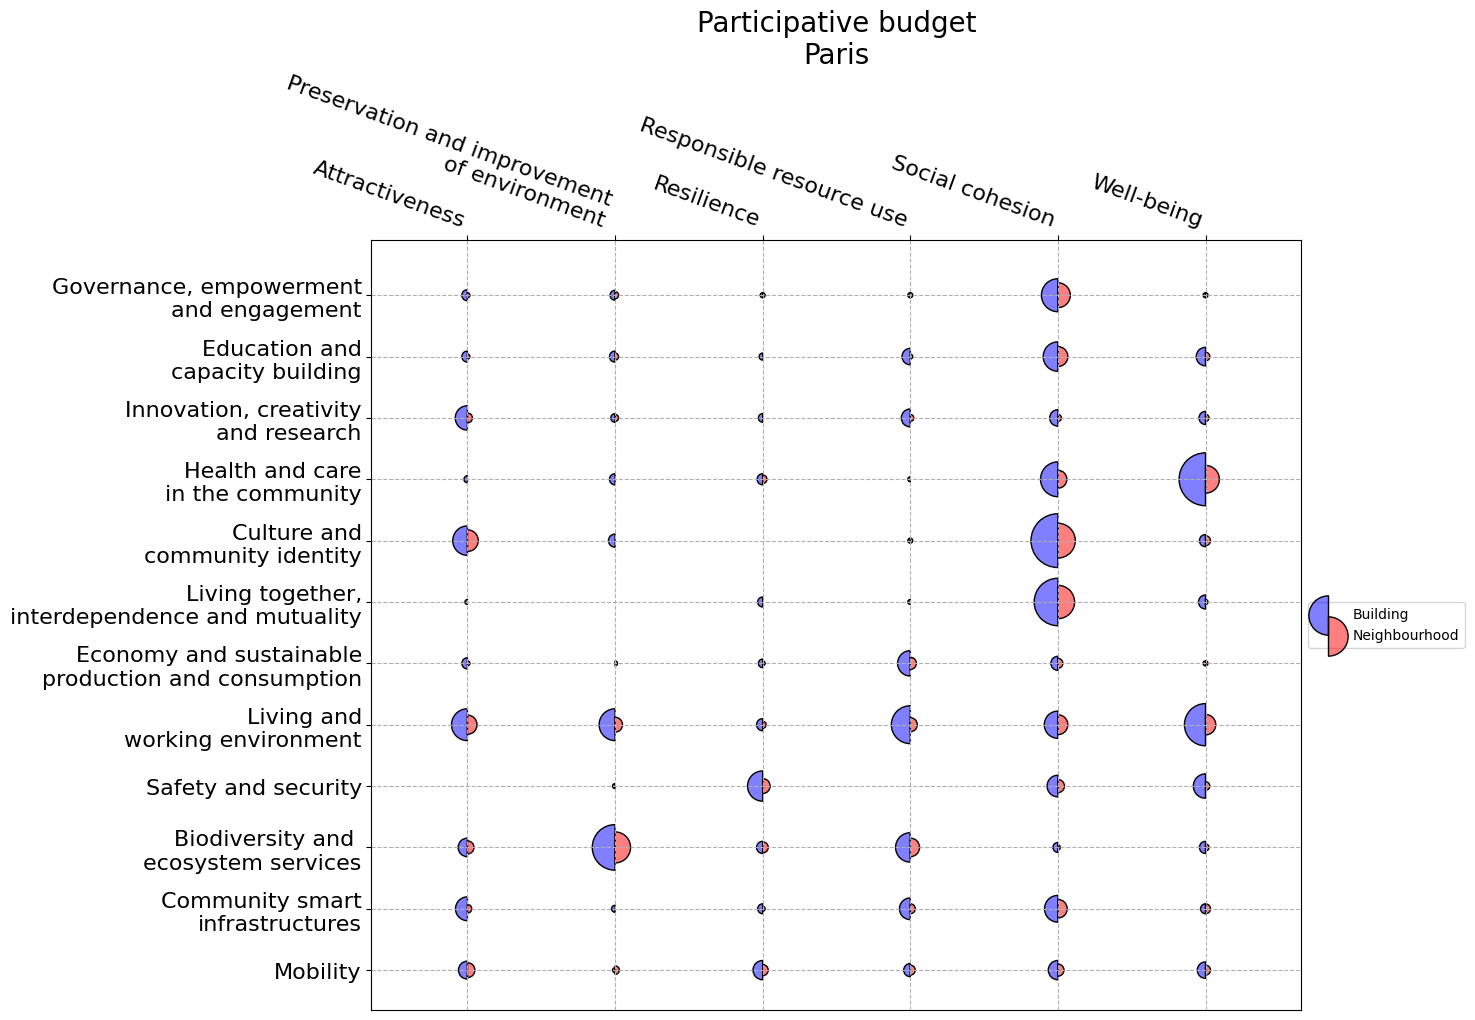

In [6]:
dfRef = pd.DataFrame(columns=df.columns)
dfUC = df

plt, ax = iImg.createImg(dfUC,dfRef,title="Participative budget\nParis")
plt.savefig("doc/WIP/Paris.png", bbox_inches='tight')
plt.savefig("doc/WIP/Paris.svg", bbox_inches='tight')

In [16]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")

# Create reports

In [5]:
from src.reportmgr import createExcel

In [16]:
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1755,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1756,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1757,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [31]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
projets['hash'] = projets['Lien URL vers le projet lauréat'].apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()) )
txts.columns = ["hash","Source","long"]
print(len(txts),len(df))
projets_h = projets.merge(txts,on="hash",how="left")
print(len(projets_h))
projets_hh = projets_h.merge(df,on="Source",how="right")
print(len(projets_hh))

799 1759
799
1759


In [42]:
fp='data/budget-participatif_operations-projets-gagnants-realisations.geojson'
gdf = gpd.read_file(fp)
cols = list(gdf.columns)
cols[0] = "Identifiant du projet lauréat"
gdf.columns = cols
P = gdf.merge(projets_hh,on="Identifiant du projet lauréat",how="right")
print(list(P.columns))
P = P.sort_values(by="long").dropna(how= "any", axis=1).reset_index(drop=True)
print(len(P),"----",len(P.Source.unique()),"texts reviewed.")
print(list(P.columns))
P.to_parquet("data/dataset.parquet.gzip",compression="gzip")
P.head(3)

['Identifiant du projet lauréat', 'titre_operation', 'titre_projet_gagnant', 'edition', 'thematique', 'direction_pilote_operation', 'type_financement_operation', 'adresse_operation', 'arrondissement_operation', 'longitude', 'latitude', 'operation_q_pop', 'quartier_operation', 'avancement_operation', 'debut_etudes_operation', 'lancement_procedure_operation', 'lancement_travaux_operation', 'livraison_prev_operation', 'ouverture_operation', 'identifiant_projet_gagnant', 'lien_projet_soumis', 'lien_projet_gagnant', 'direction_pilote_projet', 'budget_global_projet_gagnant', 'echelle_bp', 'adresse_projet_gagnant', 'arrondissement_projet_gagnant', 'projet_q_pop', 'avancement_projet', 'debut_etudes_projet', 'lancement_procedure_projet', 'lancement_travaux_projet', 'livraison_prev_projet', 'ouverture_projet', 'derniere_mise_a_jour_donnees', 'geo_point_2d', 'geometry', 'Lien URL vers le projet soumis au vote', 'Lien URL vers le projet lauréat', 'Edition', 'Titre du projet lauréat', 'Thématique',

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3584,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,13000,Budget participatif d’arrondissement,75011,Oui,FIN,...,Paris,Activities,The proposal aims to enhance the social cohesi...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing social cohesion through gatherings.,Renovation of playground with colorful ground ...,False
1,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The project aims to enhance shared gardens and...,Attractiveness,Biodiversity and ecosystem services,Building,4,Creating green spaces with biodiversity.,"Revitalize shared gardens, add greenery.",False
2,9955,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Cadre de vie,60000,Budget participatif d’arrondissement,75015,Non,ETUDES,...,Paris,Activities,The creation of green spaces and shared garden...,Social cohesion,Living and working environment,Building,3,Creating green spaces benefits community.,"Revitalize shared gardens, add greenery.",False


# Documents

In [4]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [3]:
import pandas as pd
import hashlib, os

In [7]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))
IDS = list(df.ID.unique())
K = list(chunks(IDS, 10))
for k in range(len(K)):
    if not os.path.isfile("doc/WIP/Paris_"+str(k)+".xlsx"):
        DF = df[df.ID.isin(K[k])]
        createExcel(df,"doc/WIP/Paris_"+str(k)+".xlsx","Paris budget participatif","Paris","Review of the budget")
        print(k,"done")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


1 done


# Import and consolidate

In [ ]:
from src.impt import integrateReview

In [ ]:
path ="doc/WIP/.xlsx"
pdr = integrateReview(path)
pdr

NameError: name 'integrateReview' is not defined

In [2]:
import pandas as pd
import OAI

In [5]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df

,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The text emphasizes the promotion of social co...,Social cohesion,Economy and sustainable production and consump...,Building,4,Promoting social cohesion through solidarity p...,Social project creating inclusive spaces.,False
1,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The project aims to create spaces for social i...,Social cohesion,Culture and community identity,Building,3,Create spaces for community interactions.,Social project creating inclusive spaces.,False
2,False,BudgetParis,Paris,Activities,Ce projet a pour objectif de financer des trav...,The initiatives outlined in the project focus ...,Social cohesion,"Living together, interdependence and mutuality",Building,3,Community project promotes solidarity and incl...,Social project creating inclusive spaces.,False
3,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The text highlights the involvement of the loc...,Attractiveness,"Governance, empowerment and engagement",Building,4,Involvement of community in decision-making.,Coworking space in former station.,False
4,False,BudgetParis,Paris,Activities,Un espace de coworking de 230 m² pourrait ouvr...,The project aims to foster social cohesion by ...,Social cohesion,"Innovation, creativity and research",Neighbourhood,3,Promoting innovation in local community,Coworking space in former station.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The text describes a project aimed at restorin...,Preservation and improvement of environment,Living and working environment,Building,4,Restoring two fountains in Louvre-Opéra.,Restore iconic Parisian fountains elegantly.,False
1755,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the iconic bronze fountains...,Social cohesion,Culture and community identity,Neighbourhood,3,Restoration of iconic bronze fountains.,Restore iconic Parisian fountains elegantly.,False
1756,False,BudgetParis,Paris,Activities,Le projet porté par le Conseil de Quartier Lou...,The restoration of the fountains and the impro...,Well-being,Health and care in the community,Building,2,Improving fountains benefits community well-being,Restore iconic Parisian fountains elegantly.,False
1757,False,BudgetParis,Paris,Activities,Le projet consiste à équiper des classes de 6 ...,The introduction of digital tools in elementar...,Attractiveness,"Innovation, creativity and research",Building,1,Digital tools improve elementary education.,Equipping schools with digital tools.,False


In [3]:
h = OAI.Helper("iso_ask", "./cache")
h.GOTOCACHE = "./cache/"

In [14]:
def shortSummary(x):
    return h.ask(
                    "Summarize in english the text below in up  to 5 words.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [ ]:
def longSummary(x):
    return h.ask(
                    "Summarize in english the text below in up to  5 sentences.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [ ]:
df.loc[df.Source_Title.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: shortSummary(x))


Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:34 --> 04/20/2024, 16:04:34
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:34 --> 04/20/2024, 16:04:36
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:36 --> 04/20/2024, 16:04:37
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:37 --> 04/20/2024, 16:04:38
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:38 --> 04/20/2024, 16:04:39
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:39 --> 04/20/2024, 16:04:40
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:40 --> 04/20/2024, 16:04:41
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:41 --> 04/20/2024, 16:04:42
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:42 --> 04/20/2024, 16:04:43
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:43 --> 04/20/2024, 16:04:44
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:44 --> 04/20/2024, 16:04:45
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:45 --> 04/20/2024, 16:04:47
Processing with gpt-3.5-turbo :	 04/20/2024, 16:04:4

In [19]:
SUMMARIES = [] 
for src in df.Source.unique():
    SUMMARIES.append([src,longSummary(src)])
SUMMARIES = pd.DataFrame(SUMMARIES,columns=["Source","SummaryEN"])

Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:48 --> 04/20/2024, 18:00:49
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:49 --> 04/20/2024, 18:00:49
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:49 --> 04/20/2024, 18:00:50
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:50 --> 04/20/2024, 18:00:50
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:50 --> 04/20/2024, 18:00:52
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:52 --> 04/20/2024, 18:00:52
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:52 --> 04/20/2024, 18:00:53
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:53 --> 04/20/2024, 18:00:53
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:54 --> 04/20/2024, 18:00:54
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:54 --> 04/20/2024, 18:00:55
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:55 --> 04/20/2024, 18:00:56
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:56 --> 04/20/2024, 18:00:56
Processing with gpt-3.5-turbo :	 04/20/2024, 18:00:5

In [ ]:
DF = df.merge(SUMMARIES,on="Source",how="left")
DF

In [ ]:
DF.to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")